In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
import logging
import sys

In [2]:
import os , sys
sys.path.append(os.path.join(os.path.abspath('..')))
# Import modules
from src import data_loader as dl
from scripts.Feature_Engineering import create_aggregate_features,extract_time_features,encode_categorical_variables,check_and_handle_missing_values,standardize_numerical_features,construct_rfms_scores


2025-03-06 17:02:10,870 - INFO - Directory already exists: c:\Users\HP\Documents\Dagii\Credit-scoring-model\data
2025-03-06 17:02:10,871 - INFO - Directory already exists: c:\Users\HP\Documents\Dagii\Credit-scoring-model\src\../logs


In [3]:
#import data
data = dl.load_data("data.csv")
data.head()

2025-03-06 17:02:13,405 - INFO - Attempting to load data from: c:\Users\HP\Documents\Dagii\Credit-scoring-model\data\data.csv
2025-03-06 17:02:13,745 - INFO - Successfully loaded data from: c:\Users\HP\Documents\Dagii\Credit-scoring-model\data\data.csv


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


# Step 1: Create Aggregate Features

In [4]:
data =create_aggregate_features(data)
data.head()

2025-03-06 17:02:44,985 - INFO - Creating aggregate features for customers
2025-03-06 17:02:44,987 - INFO - Processing all transactions
2025-03-06 17:02:45,093 - INFO - Aggregate features created successfully


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,109921.75,923.712185,119,3042.294251
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,109921.75,923.712185,119,3042.294251
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,1000.00,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,228727.20,6019.136842,38,17169.241610
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,228727.20,6019.136842,38,17169.241610


aggregates the transaction amounts for each customer. Specifically, it groups the data by CustomerId and calculates the sum of the Amount for each customer

# Step 2: Extract Time Features

In [5]:
data = extract_time_features(data)
data.head()

2025-03-06 17:03:21,491 - INFO - Extracting time-based features
2025-03-06 17:03:21,693 - INFO - Time features extracted successfully


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018


## Extracted Transaction Features
The above new columns were added to the DataFrame based on the transaction timestamp (TransactionStartTime):

TransactionHour: The hour of the day when the transaction occurred.

TransactionDay: The day of the month when the transaction occurred.

TransactionMonth: The month when the transaction occurred.

TransactionYear: The year when the transaction occurred

Identify Categorical Columns for Encoding

# Step 3: Construct RFMS Scores to Generate Label

2025-03-06 17:08:04,706 - INFO - Constructing RFMS scores
2025-03-06 17:08:04,739 - INFO - RFMS score distribution:
Label
0    47835
1    47827
Name: count, dtype: int64
2025-03-06 17:08:04,749 - INFO - Visualizing RFMS space


c:\Users\HP\Documents\Dagii\Credit-scoring-model\scripts\Feature_Engineering.py:310: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RFMS_score'].replace([np.inf, -np.inf], np.nan, inplace=True)
c:\Users\HP\Documents\Dagii\Credit-scoring-model\scripts\Feature_Engineering.py:311: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

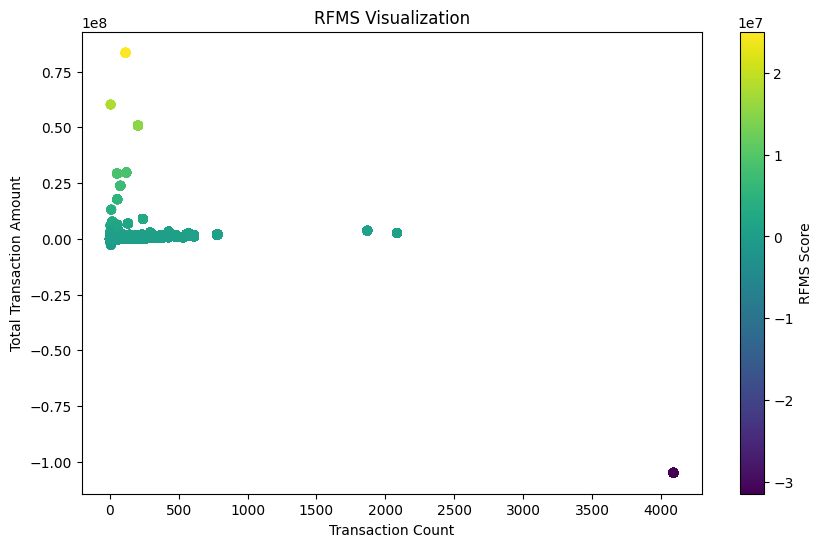

2025-03-06 17:08:06,798 - INFO - Calculating WOE for RFMS_score
2025-03-06 17:08:06,798 - INFO - Calculating WOE for feature: RFMS_score
2025-03-06 17:08:19,853 - INFO - WOE and IV calculated for RFMS_score. IV: 0
2025-03-06 17:08:19,889 - INFO - WOE calculation completed for RFMS_score
WOE Results for RFMS_score:
          RFMS_score  count  event  non_event  woe
0     -3.146877e+07     12      0         12    0
1     -3.146877e+07     16      0         16    0
2     -3.146877e+07   1999      0       1999    0
3     -3.146877e+07      6      0          6    0
4     -3.146877e+07      6      0          6    0
...             ...    ...    ...        ...  ...
20970  2.503541e+07      4      4          0    0
20971  2.503541e+07     10     10          0    0
20972  2.503541e+07     27     27          0    0
20973  2.503541e+07     44     44          0    0
20974  2.503541e+07     30     30          0    0

[20975 rows x 5 columns]
2025-03-06 17:08:19,895 - INFO - WOE calculation for RFMS

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Recency,RFMS_score,Label,RFMS_score_WOE
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,119,3042.294251,2,15,11,2018,2303,33012.225174,0,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,119,3042.294251,2,15,11,2018,2303,33012.225174,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,0.000000,2,15,11,2018,2303,300.600174,0,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,38,17169.241610,3,15,11,2018,2303,68629.560174,1,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,38,17169.241610,3,15,11,2018,2303,68629.560174,1,0


In [7]:
data = construct_rfms_scores(data)
data.head()

In [8]:
print("Unique values in CurrencyCode:", data['CurrencyCode'].unique())
print("CurrencyCode value counts:\n", data['CurrencyCode'].value_counts())

Unique values in CurrencyCode: [0]
CurrencyCode value counts:
 CurrencyCode
0    95662
Name: count, dtype: int64


In [9]:
print("FraudResult distribution by CurrencyCode:\n", data.groupby('CurrencyCode')['FraudResult'].value_counts())

FraudResult distribution by CurrencyCode:
 CurrencyCode  FraudResult
0             0              95469
              1                193
Name: count, dtype: int64


Since CurrencyCode has no variability (only one category), the WOE value for CurrencyCode = 0 is 0. This is mathematically correct because there’s no discriminatory power in a feature that doesn’t vary—it cannot differentiate between fraud and non-fraud transactions.

In [10]:
data = check_and_handle_missing_values(data)

2025-03-06 16:52:13,483 - INFO - Checking for missing values
2025-03-06 16:52:13,502 - INFO - Missing values:
TransactionId                 0
BatchId                       0
AccountId                     0
SubscriptionId                0
CustomerId                    0
CurrencyCode                  0
CountryCode                   0
ProviderId                    0
ProductId                     0
ProductCategory               0
Amount                        0
Value                         0
TransactionStartTime          0
PricingStrategy               0
FraudResult                   0
Total_Transaction_Amount      0
Average_Transaction_Amount    0
Transaction_Count             0
Std_Transaction_Amount        0
Transaction_Hour              0
Transaction_Day               0
Transaction_Month             0
Transaction_Year              0
CurrencyCode_WOE              0
CurrencyCode_WOE              0
ProviderId_WOE                0
ProviderId_WOE                0
ProductId_WOE             

In [11]:
data = standardize_numerical_features(data)
data.head()

2025-03-06 16:52:13,518 - INFO - Standardizing numerical features
2025-03-06 16:52:13,566 - INFO - Standardized features sample:
     Amount     Value  Total_Transaction_Amount  Average_Transaction_Amount  \
0 -0.046371 -0.072291                  0.170118                   -0.067623   
1 -0.054643 -0.080251                  0.170118                   -0.067623   
2 -0.050426 -0.076352                  0.165122                   -0.072568   
3  0.107717  0.096648                  0.175567                   -0.008155   
4 -0.059704 -0.075183                  0.175567                   -0.008155   

   Transaction_Count  Std_Transaction_Amount  
0          -0.311831               -0.167016  
1          -0.311831               -0.167016  
2          -0.444993               -0.201209  
3          -0.404020               -0.008243  
4          -0.404020               -0.008243  


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,CurrencyCode_WOE,ProviderId_WOE,ProviderId_WOE,ProductId_WOE,ProductId_WOE,ProductCategory_WOE,ProductCategory_WOE,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,256,5,1,0,...,0.0,3.137005,3.137005,1.645067,1.645067,1.620379,1.620379,False,True,False
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,256,3,19,2,...,0.0,2.736867,2.736867,4.189243,4.189243,-0.565446,-0.565446,True,False,False
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,256,5,0,0,...,0.0,3.137005,3.137005,0.000000,0.000000,1.620379,1.620379,False,True,False
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,256,0,11,8,...,0.0,-1.618899,-1.618899,-0.271621,-0.271621,-1.134962,-1.134962,False,True,False
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,256,3,19,2,...,0.0,2.736867,2.736867,4.189243,4.189243,-0.565446,-0.565446,True,False,False


2025-03-06 16:52:13,609 - INFO - Constructing RFMS scores
2025-03-06 16:52:13,649 - INFO - RFMS score distribution:
Label
0    47834
1    47828
Name: count, dtype: int64
2025-03-06 16:52:13,651 - INFO - Visualizing RFMS space


c:\Users\HP\Documents\Dagii\Credit-scoring-model\scripts\Feature_Engineering.py:301: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RFMS_score'].replace([np.inf, -np.inf], np.nan, inplace=True)
c:\Users\HP\Documents\Dagii\Credit-scoring-model\scripts\Feature_Engineering.py:302: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

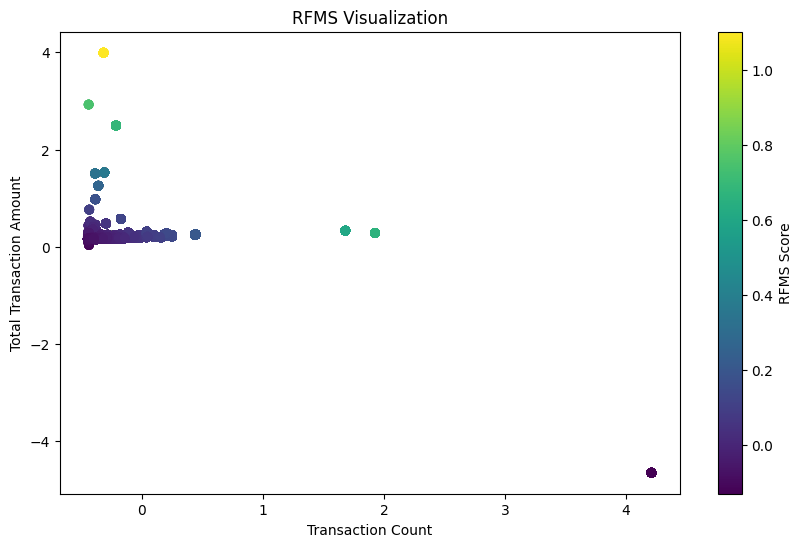

2025-03-06 16:52:15,748 - INFO - Calculating WOE for RFMS_score
2025-03-06 16:52:15,748 - INFO - Calculating WOE for feature: RFMS_score
2025-03-06 16:52:31,482 - INFO - WOE and IV calculated for RFMS_score. IV: {'RFMS_score': 0}
2025-03-06 16:52:31,501 - INFO - WOE calculation completed for RFMS_score
WOE Results for RFMS_score:
        RFMS_score  count  event  non_event  woe
0       -0.131051     12      0         12    0
1       -0.131050     16      0         16    0
2       -0.131050   1999      0       1999    0
3       -0.131050      6      0          6    0
4       -0.131049      6      0          6    0
...           ...    ...    ...        ...  ...
21022    1.103062      4      4          0    0
21023    1.103062     10     10          0    0
21024    1.103062     27     27          0    0
21025    1.103063     44     44          0    0
21026    1.103063     30     30          0    0

[21027 rows x 5 columns]
2025-03-06 16:52:31,518 - INFO - WOE calculation for RFMS_score c

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,ProductId_WOE,ProductCategory_WOE,ProductCategory_WOE,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,RFMS_score,Label,RFMS_score_WOE
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,256,5,1,0,...,1.645067,1.620379,1.620379,False,True,False,2303,-0.042340,1,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,256,3,19,2,...,4.189243,-0.565446,-0.565446,True,False,False,2303,-0.042340,1,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,256,5,0,0,...,0.000000,1.620379,1.620379,False,True,False,2303,-0.083788,0,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,256,0,11,8,...,-0.271621,-1.134962,-1.134962,False,True,False,2303,-0.068362,0,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,256,3,19,2,...,4.189243,-0.565446,-0.565446,True,False,False,2303,-0.068362,0,0


In [12]:
data = construct_rfms_scores(data)
data.head()

In [16]:
data.head(100)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,ProductId_WOE,ProductCategory_WOE,ProductCategory_WOE,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,RFMS_score,Label,RFMS_score_WOE
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,256,5,1,0,...,1.645067,1.620379,1.620379,False,True,False,2303,-0.042340,1,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,256,3,19,2,...,4.189243,-0.565446,-0.565446,True,False,False,2303,-0.042340,1,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,256,5,0,0,...,0.000000,1.620379,1.620379,False,True,False,2303,-0.083788,0,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,256,0,11,8,...,-0.271621,-1.134962,-1.134962,False,True,False,2303,-0.068362,0,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,256,3,19,2,...,4.189243,-0.565446,-0.565446,True,False,False,2303,-0.068362,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TransactionId_41595,BatchId_113893,AccountId_934,SubscriptionId_753,CustomerId_1283,0,256,5,16,0,...,1.410774,1.620379,1.620379,False,True,False,2303,-0.077751,0,0
96,TransactionId_27158,BatchId_113893,AccountId_934,SubscriptionId_753,CustomerId_1283,0,256,5,16,0,...,1.410774,1.620379,1.620379,False,True,False,2303,-0.077751,0,0
97,TransactionId_3262,BatchId_113893,AccountId_934,SubscriptionId_753,CustomerId_1283,0,256,5,16,0,...,1.410774,1.620379,1.620379,False,True,False,2303,-0.077751,0,0
98,TransactionId_80879,BatchId_113893,AccountId_934,SubscriptionId_753,CustomerId_1283,0,256,5,16,0,...,1.410774,1.620379,1.620379,False,True,False,2303,-0.077751,0,0


In [13]:
ef = data_with_features
print(ef.dtypes)

NameError: name 'data_with_features' is not defined

In [ ]:
# Identify categorical columns in the 'ef' DataFrame
categorical_columns = data_with_features.select_dtypes(include=['object', 'category']).columns

# Print the list of categorical columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId'],
      dtype='object')


In [ ]:


data_encoded = fe.encoding(data_with_features)


INFO:Feature_Engineering:encoding the categorical variables
INFO:Feature_Engineering:label encoding for ordinal categorical variables
INFO:Feature_Engineering:Checking data types of columns for WOE encoding
INFO:Feature_Engineering:TransactionId                              object
BatchId                                    object
AccountId                                  object
SubscriptionId                             object
CustomerId                                 object
CurrencyCode                               object
CountryCode                                 int64
ProviderId                                 object
ProductId                                  object
ProductCategory                            object
ChannelId                                  object
Amount                                    float64
Value                                       int64
TransactionStartTime          datetime64[ns, UTC]
PricingStrategy                             int64
FraudResult       

In [ ]:
data_encoded.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,CurrencyCode_WOE,ProviderId_WOE,ProductId_WOE,ProductCategory_WOE
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,256,5,1,0,...,119,3042.294251,2,15,11,2018,0.0,3.137005,1.645067,1.620379
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,256,3,19,2,...,119,3042.294251,2,15,11,2018,0.0,2.736867,4.189243,-0.565446
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,256,5,0,0,...,2,0.000000,2,15,11,2018,0.0,3.137005,inf,1.620379
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,256,0,11,8,...,38,17169.241610,3,15,11,2018,0.0,-1.618899,-0.271621,-1.134962
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,256,3,19,2,...,38,17169.241610,3,15,11,2018,0.0,2.736867,4.189243,-0.565446


In [ ]:

#from Feature_Engineering import check_missing_values

# Assuming data_encoded is your DataFrame
missing_values = check_missing_values(data_encoded)
print(missing_values)

Missing values in each column:
 TransactionId                   0
BatchId                         0
AccountId                       0
SubscriptionId                  0
CustomerId                      0
CurrencyCode                    0
CountryCode                     0
ProviderId                      0
ProductId                       0
ProductCategory                 0
ChannelId                       0
Amount                          0
Value                           0
TransactionStartTime            0
PricingStrategy                 0
FraudResult                     0
Total_Transaction_Amount        0
Average_Transaction_Amount      0
Transaction_Count               0
Std_Transaction_Amount        712
Transaction_Hour                0
Transaction_Day                 0
Transaction_Month               0
Transaction_Year                0
CurrencyCode_WOE                0
ProviderId_WOE                  0
ProductId_WOE                   0
ProductCategory_WOE             0
dtype: int64
Tra

The missing values in the Std_Transaction_Amount column likely arose because the standard deviation (std) cannot be calculated for customers who have only one transaction. Standard deviation measures the variation or spread of a set of values. If a customer has only a single transaction, there's no variation to measure, and hence the standard deviation is undefined, resulting in a NaN.

In [ ]:
# Fill missing values in 'Std_Transaction_Amount' with zero
data_encoded['Std_Transaction_Amount'].fillna(0, inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_15836\2773339636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_encoded['Std_Transaction_Amount'].fillna(0, inplace=True)


In [ ]:
# Recheck for missing values
missing_values = check_missing_values(data_encoded)
print(missing_values)

Missing values in each column:
 TransactionId                 0
BatchId                       0
AccountId                     0
SubscriptionId                0
CustomerId                    0
CurrencyCode                  0
CountryCode                   0
ProviderId                    0
ProductId                     0
ProductCategory               0
ChannelId                     0
Amount                        0
Value                         0
TransactionStartTime          0
PricingStrategy               0
FraudResult                   0
Total_Transaction_Amount      0
Average_Transaction_Amount    0
Transaction_Count             0
Std_Transaction_Amount        0
Transaction_Hour              0
Transaction_Day               0
Transaction_Month             0
Transaction_Year              0
CurrencyCode_WOE              0
ProviderId_WOE                0
ProductId_WOE                 0
ProductCategory_WOE           0
dtype: int64
TransactionId                 0
BatchId                    

In [ ]:
# Standardize numerical features and display
data_standardized = Standardize_numeical_features(data_encoded)


INFO:Feature_Engineering:normalize the numerical features
INFO:Feature_Engineering:the result of the standardized numeical featuresis  
      Amount     Value  Total_Transaction_Amount  Average_Transaction_Amount  \
0 -0.046371 -0.072291                  0.170118                   -0.067623   
1 -0.054643 -0.080251                  0.170118                   -0.067623   
2 -0.050426 -0.076352                  0.165122                   -0.072568   
3  0.107717  0.096648                  0.175567                   -0.008155   
4 -0.059704 -0.075183                  0.175567                   -0.008155   

   Transaction_Count  Std_Transaction_Amount  
0          -0.311831               -0.167016  
1          -0.311831               -0.167016  
2          -0.444993               -0.201209  
3          -0.404020               -0.008243  
4          -0.404020               -0.008243  


In [ ]:
data_standardized.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,CurrencyCode_WOE,ProviderId_WOE,ProductId_WOE,ProductCategory_WOE
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,256,5,1,0,...,-0.311831,-0.167016,2,15,11,2018,0.0,3.137005,1.645067,1.620379
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,256,3,19,2,...,-0.311831,-0.167016,2,15,11,2018,0.0,2.736867,4.189243,-0.565446
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,256,5,0,0,...,-0.444993,-0.201209,2,15,11,2018,0.0,3.137005,inf,1.620379
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,256,0,11,8,...,-0.404020,-0.008243,3,15,11,2018,0.0,-1.618899,-0.271621,-1.134962
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,256,3,19,2,...,-0.404020,-0.008243,3,15,11,2018,0.0,2.736867,4.189243,-0.565446


INFO:Feature_Engineering:constructing the RFMS scores
INFO:Feature_Engineering:Calculate Recency as days since last transaction
INFO:Feature_Engineering:visualizing the RFMS space


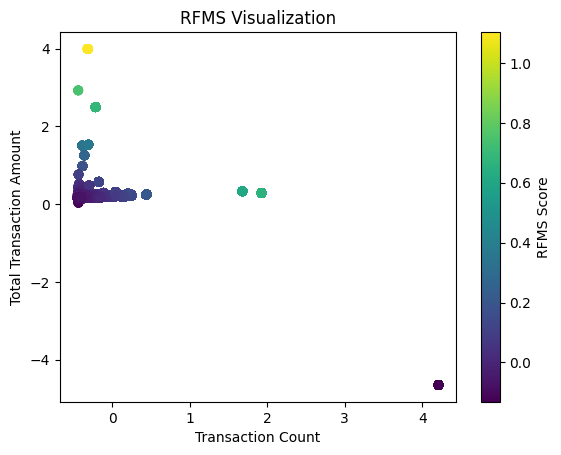

INFO:Feature_Engineering:assigning the good and bad labels
c:\Users\HP\Documents\Dagii\Credit-scoring-model\scripts\Feature_Engineering.py:220: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RFMS_score'].replace([np.inf, -np.inf], np.nan, inplace=True)
c:\Users\HP\Documents\Dagii\Credit-scoring-model\scripts\Feature_Engineering.py:221: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method

RFMS Score and Labels after assignment:
    RFMS_score  Label
0   -0.042337      1
1   -0.042337      1
2   -0.083785      0
3   -0.068359      0
4   -0.068359      0
Label Distribution after assignment:
 Label
0    47834
1    47828
Name: count, dtype: int64
WoE Results:
       RFMS_score  count  event  non_event  woe
0       -0.131048     12      0         12  0.0
1       -0.131047     16      0         16  0.0
2       -0.131047   1137      0       1137  0.0
3       -0.131047    862      0        862  0.0
4       -0.131047      6      0          6  0.0
...           ...    ...    ...        ...  ...
20974    1.103065      6      6          0  0.0
20975    1.103065     12     12          0  0.0
20976    1.103066     41     41          0  0.0
20977    1.103066     39     39          0  0.0
20978    1.103066     17     17          0  0.0

[20979 rows x 5 columns]


In [ ]:
data = constructinf_RFMS_scores(data_standardized)

In [ ]:
label_counts = data_standardized['Label'].value_counts()
print("Label Distribution:\n", label_counts)


Label Distribution:
 Label
0    47834
1    47828
Name: count, dtype: int64


In [ ]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Transaction_Day,Transaction_Month,Transaction_Year,CurrencyCode_WOE,ProviderId_WOE,ProductId_WOE,ProductCategory_WOE,Recency,RFMS_score,Label
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,256,5,1,0,...,15,11,2018,0.0,3.137005,1.645067,1.620379,2265,-0.042337,1
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,256,3,19,2,...,15,11,2018,0.0,2.736867,4.189243,-0.565446,2265,-0.042337,1
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,256,5,0,0,...,15,11,2018,0.0,3.137005,inf,1.620379,2265,-0.083785,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,256,0,11,8,...,15,11,2018,0.0,-1.618899,-0.271621,-1.134962,2265,-0.068359,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,256,3,19,2,...,15,11,2018,0.0,2.736867,4.189243,-0.565446,2265,-0.068359,0


# RFMS Score and Label Assignment for Customer Segmentation

1. **Recency**: 
   - Measures the time since the last transaction.
   - Lower recency indicates more recent activity.

2. **Frequency (Transaction_Count)**:
   - Counts the number of transactions.
   - Higher frequency indicates more engaged customers.

3. **Monetary (Total_Transaction_Amount)**:
   - Sums the total amount spent by the customer.
   - Higher amounts indicate more valuable customers.

4. **Additional Score (Std_Transaction_Amount)**:
   - Measures the variability in spending behavior.

## Calculation
The RFMS score is calculated using the following formula:

Labels are assigned based on the median RFMS score:

Good: RFMS score above the median.

Bad: RFMS score below or equal to the median.
Assign Good (1) and Bad (0) labels based on the threshold

In [ ]:
data.to_csv('../data/proceced_data.csv')